# Creating and Backtesting Stochastic Oscillator Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
pd.read_csv("EURUSD_ohlc.csv")

,Unnamed: 0,Open,High,Low,Close
0,2008-01-01,1.45905,1.47502,1.45885,1.47146
1,2008-01-02,1.47146,1.47812,1.46876,1.47510
2,2008-01-03,1.47504,1.48254,1.46958,1.47429
3,2008-01-05,1.47451,1.47559,1.47430,1.47465
4,2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...,...
3806,2020-12-23,1.21873,1.22158,1.21774,1.21849
3807,2020-12-27,1.21892,1.22504,1.21812,1.22152
3808,2020-12-28,1.22145,1.22752,1.22086,1.22502
3809,2020-12-29,1.22508,1.23102,1.22495,1.23000


In [3]:
data = pd.read_csv("EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


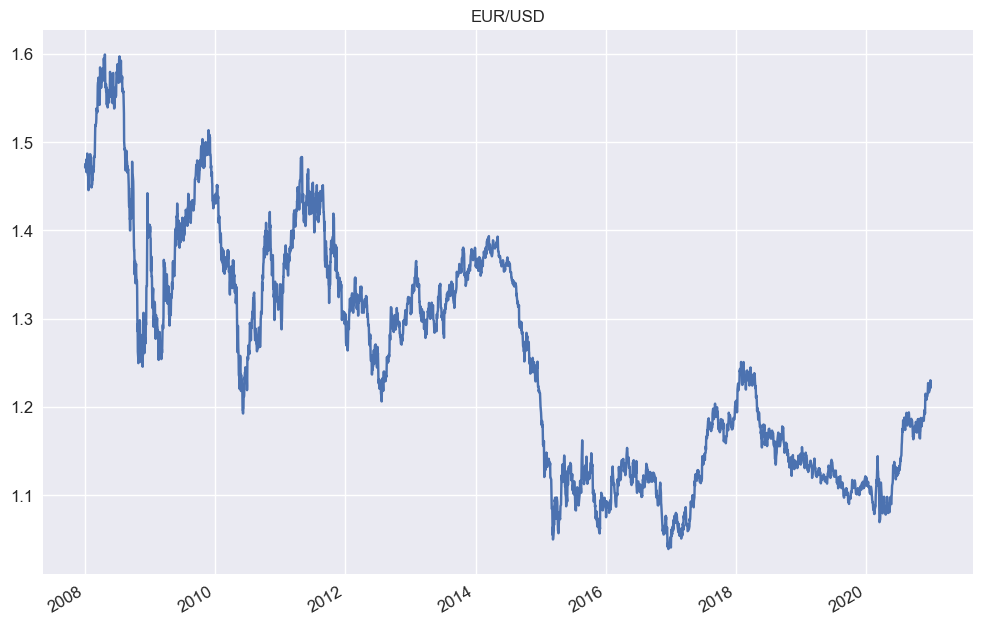

In [5]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

## Defining an SO Strategy

The __Stochastic Oscillator Indicator__ consists of two different lines/oscillators that are bounded by __0 and 100__: <br>
- __Fast Stochastic Indicator__ (%K line)
- __Slow Stochastic Indicator__ (%D line)

In [6]:
periods = 14

In [7]:
data["roll_low"] = data.Low.rolling(periods).min()

In [8]:
data["roll_high"] = data.High.rolling(periods).max()

In [9]:
data

,Open,High,Low,Close,roll_low,roll_high
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN
...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102


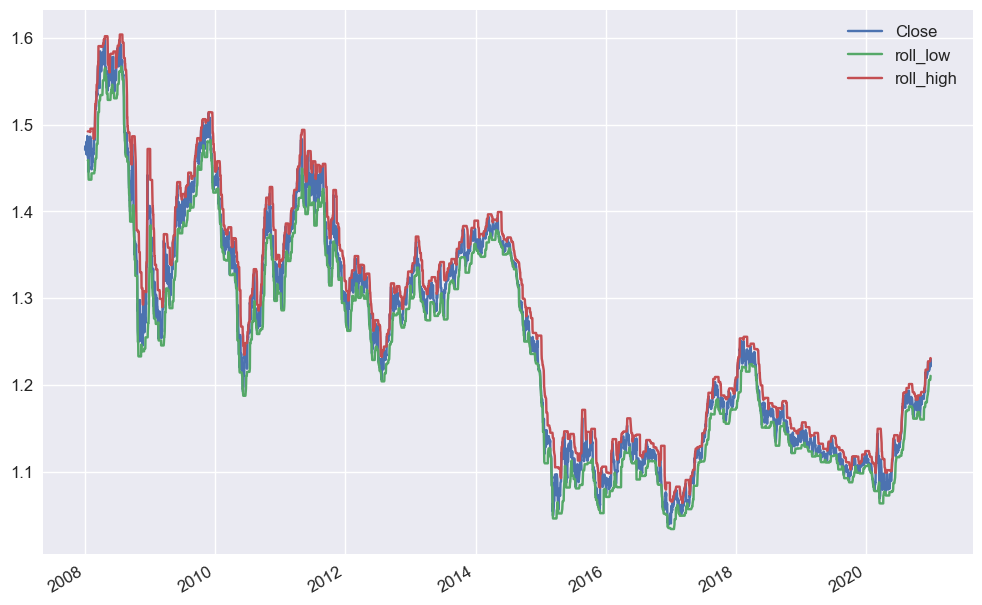

In [10]:
data.loc[:, ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

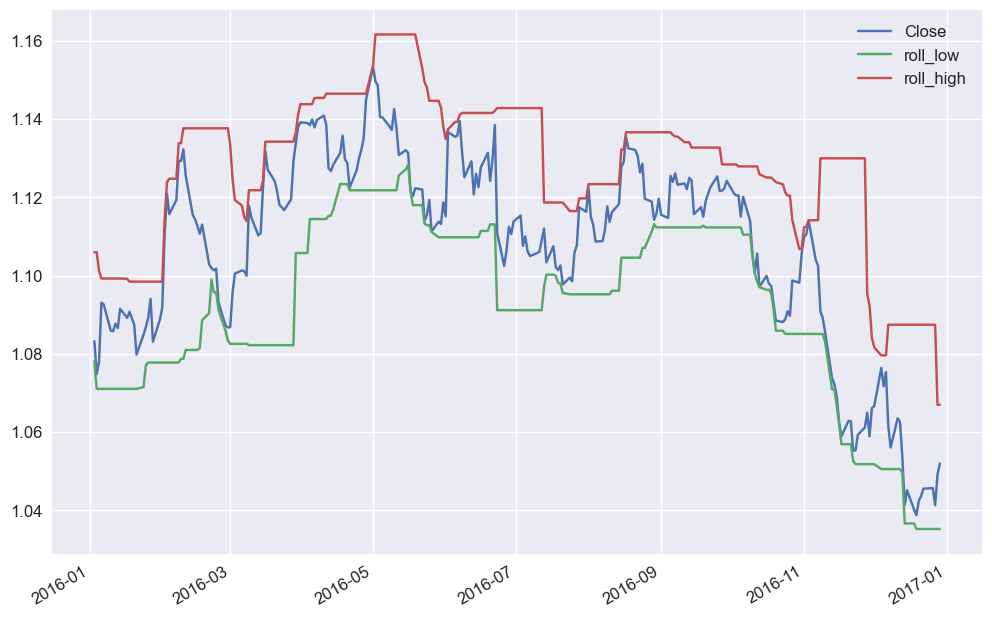

In [11]:
data.loc["2016", ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [12]:
data["K"] = (data.Close - data.roll_low) / (data.roll_high - data.roll_low) * 100

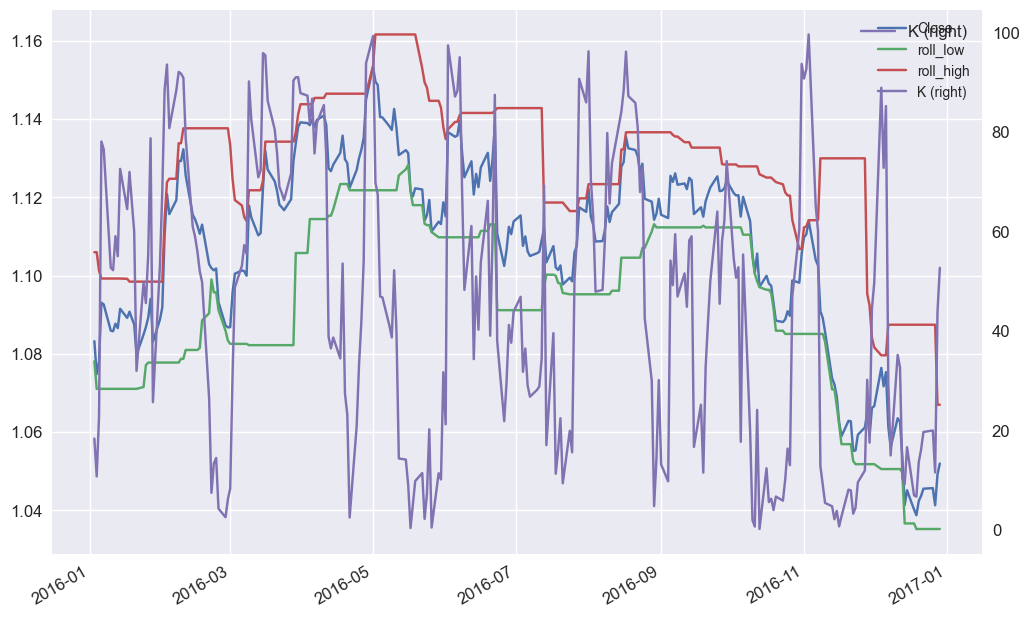

In [13]:
data.loc["2016", ["Close", "roll_low", "roll_high", "K"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "K")
plt.legend(fontsize = 12)
plt.show()

In [14]:
moving_av = 3

In [15]:
data["D"] = data.K.rolling(moving_av).mean()

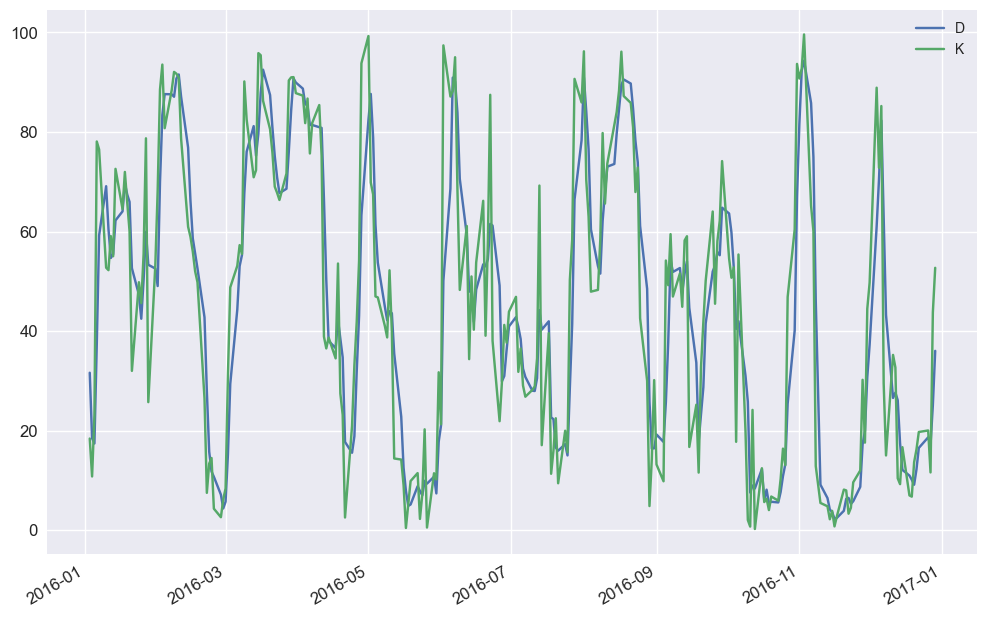

In [16]:
data.loc["2016", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

In [17]:
data["position"] = np.where(data["K"] > data["D"], 1, -1)

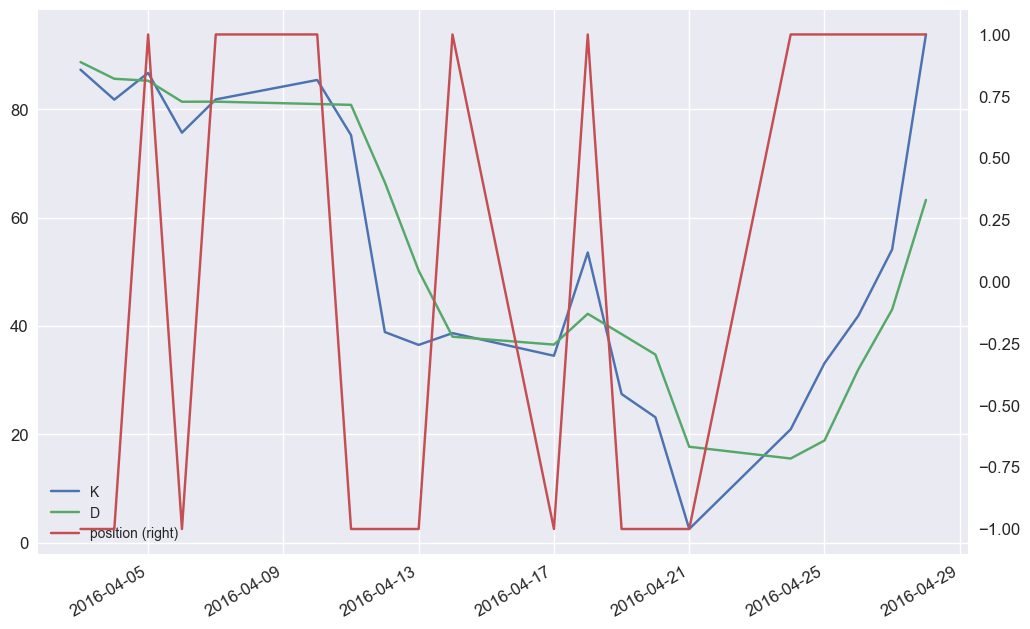

In [18]:
data.loc["04-2016", ["K", "D", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")
plt.show()

## Vectorized Strategy Backtesting

In [19]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [20]:
data.dropna(inplace = True)

In [21]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [22]:
data.dropna(inplace = True)

In [23]:
ptc = 0.00007

In [24]:
data["trades"] = data.position.diff().fillna(0).abs()

In [25]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [26]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

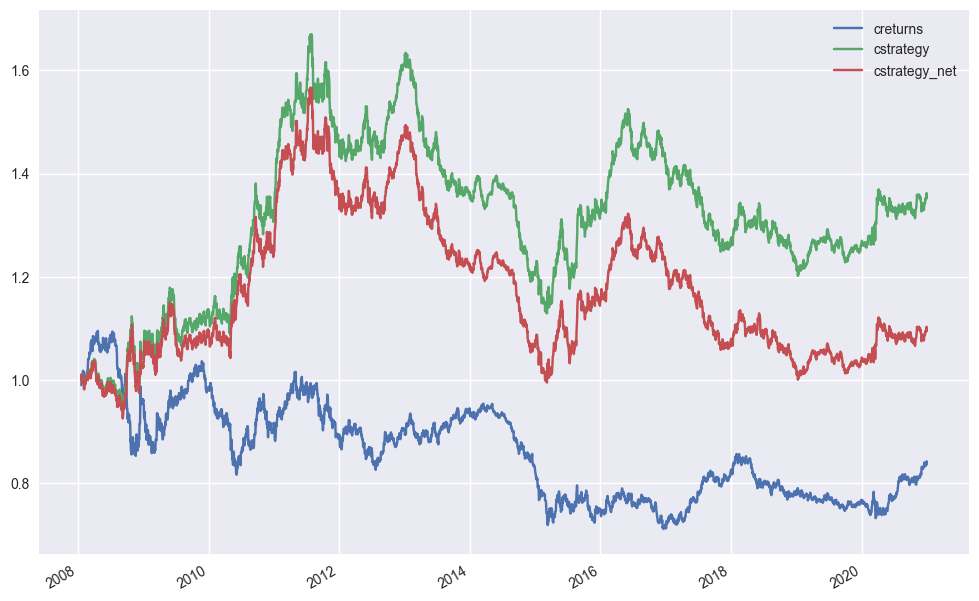

In [27]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

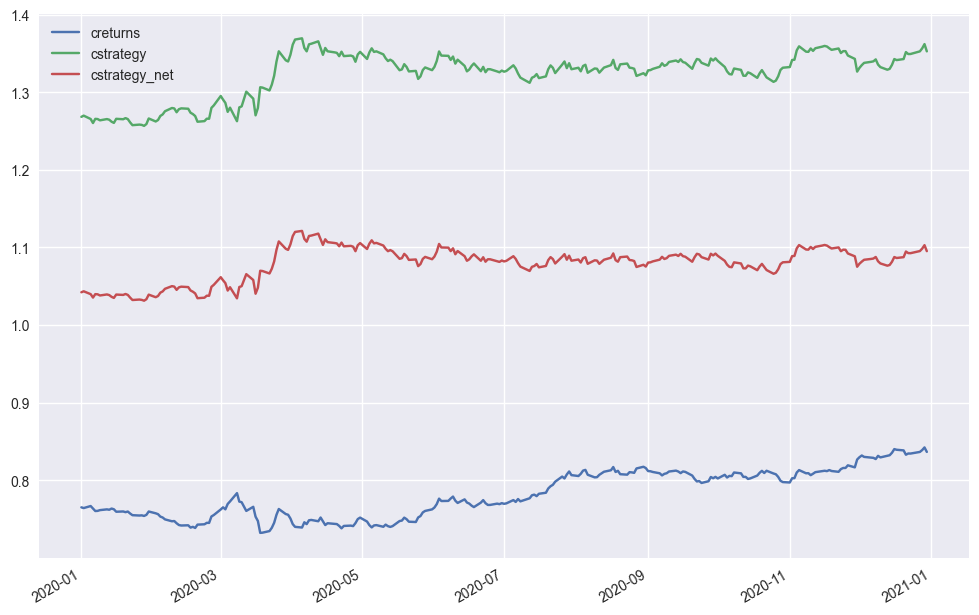

In [28]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()